In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from matplotlib import colors
from scipy.special import erf
import pretty
%matplotlib inline

# FilGen

In [2]:
from FilGen import filament_models
lbox=30 # box size in Mpc/h
FM=filament_models(lbox=lbox, pbc=False)

In [3]:
sigvb=300
bmul_bg=200
s=0.5
rho0=2 # background density (comparable to mean density in 1024^3, 300Mpc/h simulation)
cf=30 # central concentration
seed=10
start_spine=np.array([5,5, 15])
Rf=FM.r_trunc(s, cf)
print("Rf:",Rf)
N_z=20
N_r=20
N_phi=10
rmin=1e-1
rmax=Rf

Nreal=50

def pos_spine(t):
    x=20*t
    y=20*t
    z=10*np.sin(2*np.pi*t)
    return np.array([x, y, z])
def tang_spine(t):
    x=20*np.ones_like(t)
    y=20*np.ones_like(t)
    z=20*np.pi*np.cos(2*np.pi*t)
    return np.array([x, y,z])

t=np.linspace(0, 1, 50)
P_spine=(pos_spine(t).T-pos_spine(0)+start_spine)


#make sure the lcyl and Rf values are given properly
def vz_mean_prof(r, z, phi):
    lcyl= 50.7179
    cent=lcyl/2
    vz_mean=((z-cent)/lcyl)*250
    return vz_mean

# self similar profiles, so that when r/s is plotted on the x-axis, same footing
def vr_mean_prof(r, z, phi):
    s=0.5
    cf=30
    Rf=s*np.sqrt(2*np.log(cf))
    vr_inner=(1+ erf(15*(r/Rf-1/8)))
    vr_outer=(1+erf(2.5*(-r/Rf+1/8)))
    vr_mean=vr_inner*vr_outer/2
    return vr_mean*250
    
def vr_std_prof(r, z, phi):
    s=0.5
    cf=30
    Rf=s*np.sqrt(2*np.log(cf))
    sigvb=300
    r_trans=0.5
    h=600 # inner sigma-outer sigma
    slope=8 # determines how fast the transition happens
    vr_std=(h/2+sigvb)-(h/2)*np.tanh((r/Rf-r_trans)*slope)
    return vr_std

def vz_std_prof(r, z, phi):
    sigvb=300
    vz_std=sigvb*np.ones_like(z)
    return vz_std

def vphi_std_prof(r, z, phi):
    sigvb=300
    vphi_std=sigvb*np.ones_like(r)
    return vphi_std

R1=0.6
R2=0.5
c1=8
c2=8

Rf: 1.3040700482838634


In [4]:
# no halo outskirts
D=FM.create_filament_bg1(pos_spine, tang_spine, rho0,s,cf, start_spine,  
                            c1=c1, R1=R1,c2=c2, R2=R2, bmul_bg=bmul_bg,seed=1,
                             vel=True,sigvb=sigvb, vz_mean_prof=vz_mean_prof, vr_mean_prof=vr_mean_prof, 
                            vz_std_prof=vz_std_prof, vr_std_prof=vr_std_prof, 
                         vphi_std_prof=vphi_std_prof)

total number of particles: 60524
vz at center: 0.05657317878571514
creating first node

 number of particles of filament deleted inside halo1: 17
creating second node

 number of particles of filament deleted inside halo2: 12
number of particles deleted on top of halo1: 1
number of particles deleted on top of the filament: 574


In [5]:
D.keys()

dict_keys(['vel_full', 'pos_full', 'cent', 'Rf'])

In [6]:
Pos=D["pos_full"]

# Density projection plots

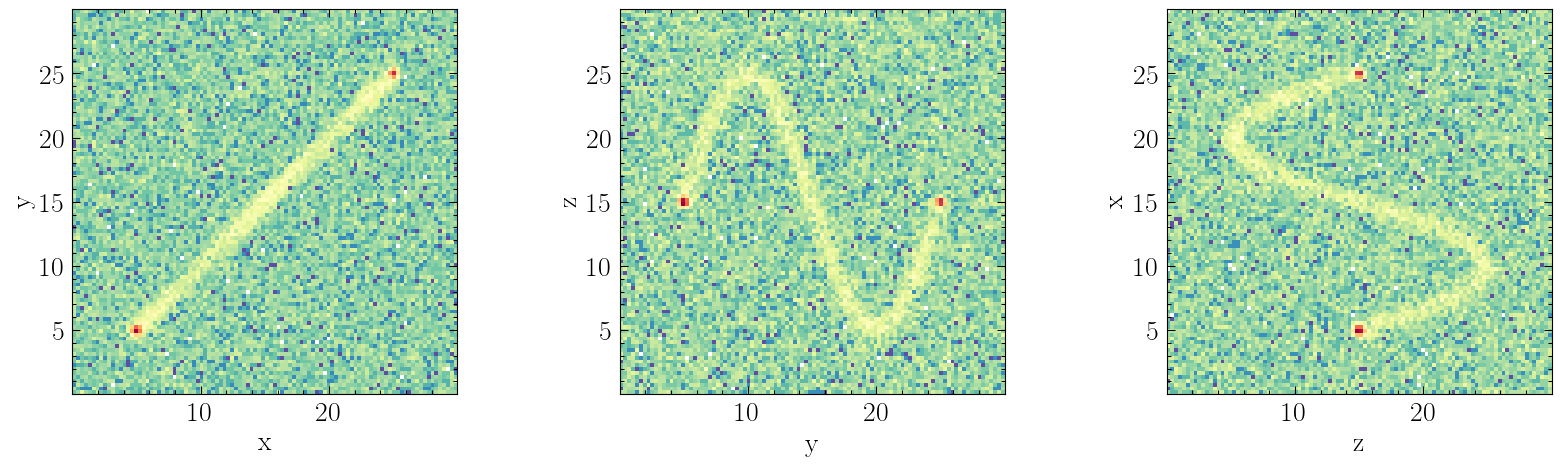

In [7]:
fig, ax=plt.subplots(1, 3, figsize=(20,5))
labels=["x", "y", "z"]
for i in range(3):
    ax[i].hist2d(Pos[:,i], Pos[:, (i+1)%3], bins=100, norm=colors.LogNorm(), cmap="Spectral_r")
    ax[i].set_xlabel(labels[i])
    ax[i].set_ylabel(labels[(i+1)%3])
    ax[i].set_aspect(1)

# With halo outskirts

In [8]:
def cdf_r_2h1(r):
    R1=0.6
    x=r/R1
    return np.log(x)

def cdf_r_2h2(r):
    R1=0.5
    x=r/R1
    return np.log(x)


D=FM.create_filament_bg1(
    pos_spine=pos_spine,
    tang_spine=tang_spine,
    rho0=rho0,
    s=s,
    cf=cf,
    start_spine=start_spine,
    c1=c1,
    R1=R1,
    c2=c2,
    R2=R2,
    seed=2,
    vel=False,
    cdf_r_2h1=cdf_r_2h1,
    mul_2h1=1,
    cdf_r_2h2=cdf_r_2h2,
    mul_2h2=1
)

total number of particles: 62382
creating first node

 number of particles of filament deleted inside halo1: 20
creating second node

 number of particles of filament deleted inside halo2: 8
creating first halo outskirts
4R200m for the first halo: [3.92424389]
creating second halo outskirts
4R200m for the second halo: [3.27020324]
number of particles deleted on top of halo1 and outskirts: 540
number of particles deleted on top of the filament: 476


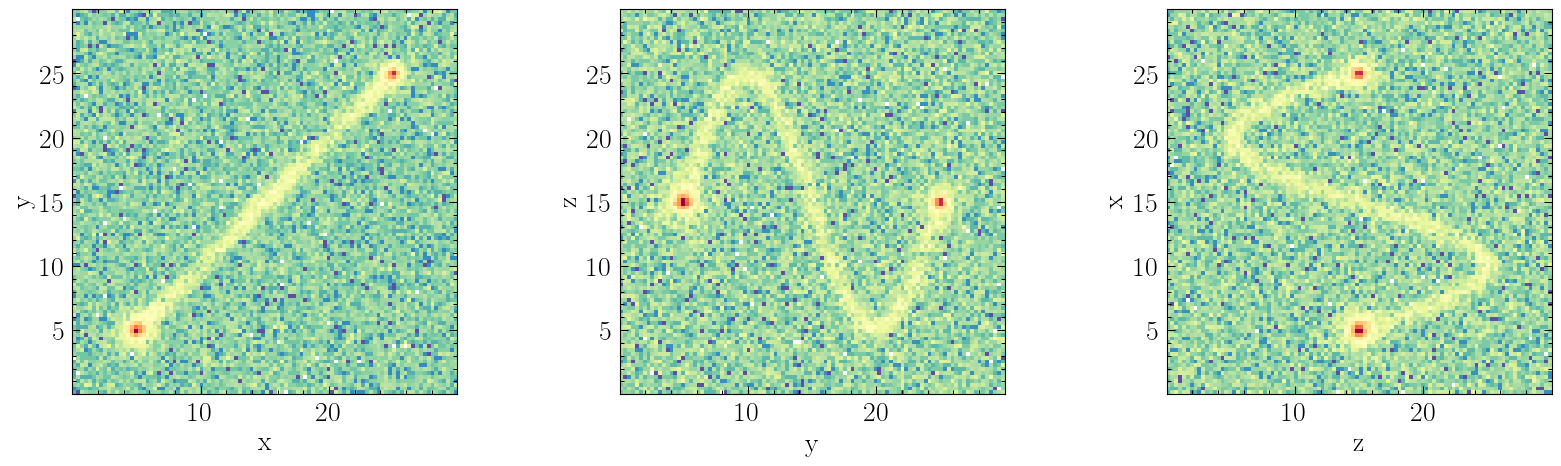

In [9]:
Pos=D["pos_full"]
fig, ax=plt.subplots(1, 3, figsize=(20,5))
labels=["x", "y", "z"]
for i in range(3):
    ax[i].hist2d(Pos[:,i], Pos[:, (i+1)%3], bins=100, norm=colors.LogNorm(), cmap="Spectral_r")
    ax[i].set_xlabel(labels[i])
    ax[i].set_ylabel(labels[(i+1)%3])
    ax[i].set_aspect(1)

# FilApt

In [26]:
from FilAPT import ExtractProfiles as EFP
EP=EFP(lbox=30, pbc=False, mp=1, dim=3)
%matplotlib inline

## Creating filaments without nodes

In [27]:
# no halo outskirts
D=FM.create_filament_bg1(pos_spine, tang_spine, rho0,s,cf, start_spine,seed=1,
                             vel=True,sigvb=sigvb, vz_mean_prof=vz_mean_prof, vr_mean_prof=vr_mean_prof, 
                            vz_std_prof=vz_std_prof, vr_std_prof=vr_std_prof, 
                         vphi_std_prof=vphi_std_prof)

total number of particles: 58622
vz at center: 0.05657317878571514
number of particles deleted on top of the filament: 542


In [12]:
Pos=D["pos_full"]
Vel=D["vel_full"]

In [13]:
# defining the spine
t=np.linspace(0, 1, 50)
Psp=pos_spine(t).T+start_spine

In [14]:
fig, ax=plt.subplots(1, 3, figsize=(20,5))
labels=["x", "y", "z"]
for i in range(3):
    ax[i].hist2d(Pos[:,i], Pos[:, (i+1)%3], bins=100, norm=colors.LogNorm(), cmap="Spectral_r")
    ax[i].set_xlabel(labels[i])
    ax[i].set_ylabel(labels[(i+1)%3])
    ax[i].set_aspect(1)
    
    ax[i].plot(Psp[:,i], Psp[:, (i+1)%3], "k")

# Estimating profiles

In [15]:
rmin=0.1
rmax=2
N_r=10
D1=EP.estimate_profile(Pos=Pos, P=Psp, rmin=rmin, rmax=rmax,N_r=10, N_z=20, N_phi=20, log=True, Vel=Vel, bin_in_phi=False)

In [16]:
D1.keys()

dict_keys(['rho', 'Num', 'Vol', 'vz', 'vr', 'sigvr', 'sigvz', 'rho_r', 'rho_z', 'Vol_r', 'Vol_z', 'vz_r', 'vz_z', 'vr_r', 'vr_z', 'sigvz_r', 'sigvz_z', 'sigvr_r', 'sigvr_z', 'rbins', 'rmid', 'zbins', 'zmid'])

In [17]:
fig, ax=plt.subplots(3,2, figsize=(20,30))
ax[0][0].plot(D1["rmid"], D1["rho_r"], "ko:")
ax[0][1].plot(D1["zmid"], D1["rho_z"], "ko:")


ax[1][0].plot(D1["rmid"], D1["vr_r"], "ko:")
ax[1][1].plot(D1["zmid"], D1["vz_z"], "ko:")

ax[2][0].plot(D1["rmid"], D1["sigvr_r"], "ko:")
ax[2][1].plot(D1["zmid"], D1["sigvz_z"], "ko:")

for i in range(3):
    ax[i][0].set_xscale("log")

# Optimized Smoothing

In [82]:
from FilAPT_latest import SmoothSpine
SS=SmoothSpine(lbox=lbox)

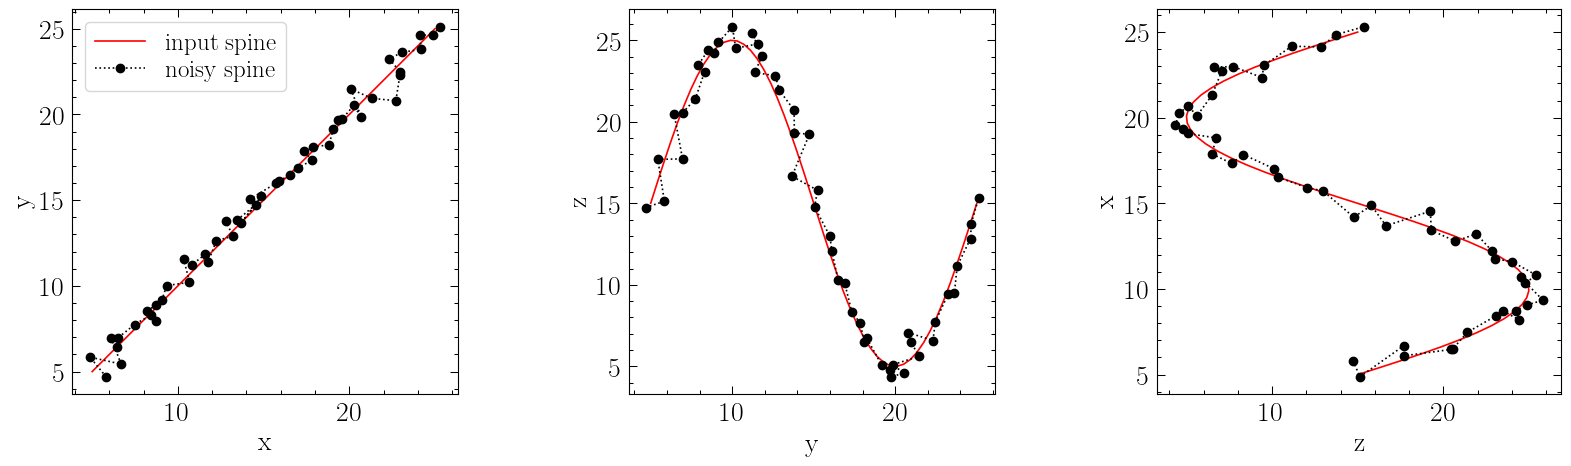

In [102]:
np.random.seed(1)
P_err=Psp+np.random.normal(0, s, size=np.shape(Psp))

fig, ax=plt.subplots(1, 3, figsize=(20,5))
labels=["x", "y", "z"]
for i in range(3):
    ax[i].set_aspect(1)
    ax[i].plot(Psp[:,i], Psp[:, (i+1)%3], "r", label="input spine")
    ax[i].plot(P_err[:,i], P_err[:, (i+1)%3], "ko:", label="noisy spine")
    ax[i].set_xlabel(labels[i])
    ax[i].set_ylabel(labels[(i+1)%3])
ax[0].legend()

In [103]:
op_file="filtools.txt"
D2=SS.opt_fou(P_err,Pos,rmin, rmax, op_file,
                pad_type="odd", pad_len="full",n_interp="mindis", s_filt_frac=5,
                N_z=20, N_r=20, N_phi=20, 
                kmax_frac=4,Nsamp=10, dsig=5,verbose=False, f_nseg=1)

0 min 4.63 seconds



In [104]:
D2.keys()

dict_keys(['lfil_fou', 'radius', 'k0', 'pnew'])

In [107]:
pnew=D2["pnew"]

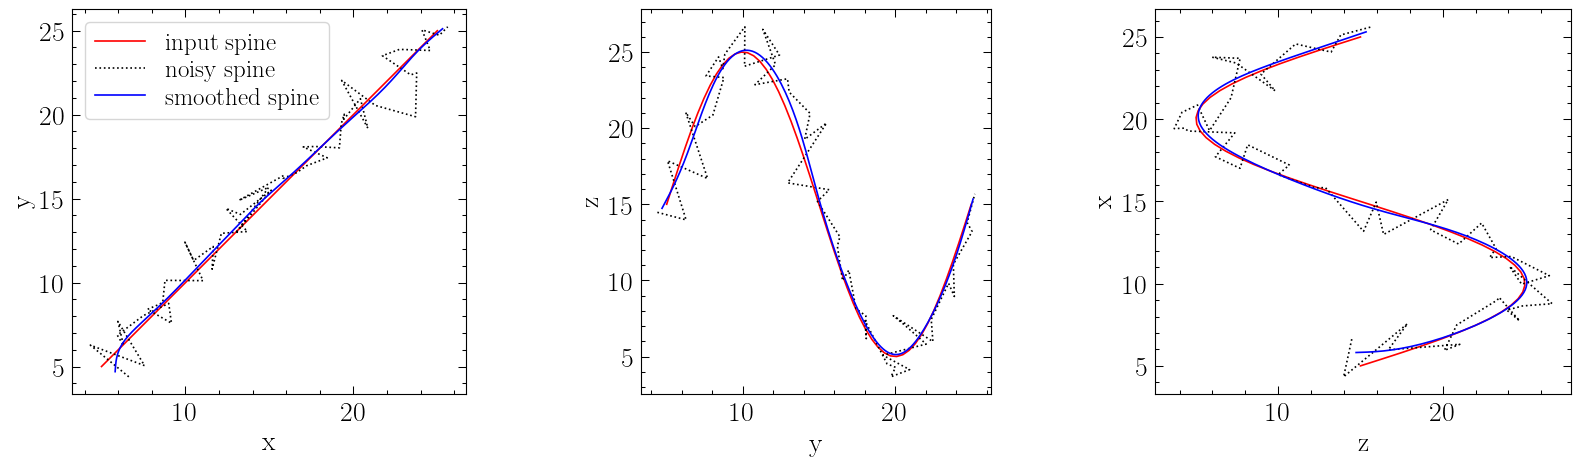

In [109]:
np.random.seed(1)
P_err=Psp+np.random.normal(0, 1, size=np.shape(Psp))

fig, ax=plt.subplots(1, 3, figsize=(20,5))
labels=["x", "y", "z"]
for i in range(3):
    ax[i].set_aspect(1)
    ax[i].plot(Psp[:,i], Psp[:, (i+1)%3], "r", label="input spine")
    ax[i].plot(P_err[:,i], P_err[:, (i+1)%3], "k:", label="noisy spine")
    ax[i].plot(pnew[:,i], pnew[:, (i+1)%3], "b", label="optimally smoothed spine")
    ax[i].set_xlabel(labels[i])
    ax[i].set_ylabel(labels[(i+1)%3])
ax[0].legend()